Name: Sampanna Timalsina

Student Id: 2409033

 # 1. Exploratory Data Analysis and Data Understanding

In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Concept and Technology of AI/Final Assestment/bodyfatmeasurement.csv')

In [3]:
columns= df.columns

In [4]:
# Display basic dataset information
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [5]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
          Density     BodyFat         Age      Weight      Height        Neck  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean     1.055574   19.150794   44.884921  178.924405   70.148810   37.992063   
std      0.019031    8.368740   12.602040   29.389160    3.662856    2.430913   
min      0.995000    0.000000   22.000000  118.500000   29.500000   31.100000   
25%      1.041400   12.475000   35.750000  159.000000   68.250000   36.400000   
50%      1.054900   19.200000   43.000000  176.500000   70.000000   38.000000   
75%      1.070400   25.300000   54.000000  197.000000   72.250000   39.425000   
max      1.108900   47.500000   81.000000  363.150000   77.750000   51.200000   

            Chest     Abdomen         Hip       Thigh        Knee       Ankle  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean   100.824206   92.555952   99.904762   59.405952   38.590476   23.102381   
std   

In [6]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64


In [7]:
# Check for duplicate values
duplicates = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")


Number of Duplicate Rows: 0


In [8]:
# Display first few rows of the dataset
print("\nFirst Five Rows:")
print(df.head())


First Five Rows:
   Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0   1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4   1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2   

   Knee  Ankle  Biceps  Forearm  Wrist  
0  37.3   21.9    32.0     27.4   17.1  
1  37.3   23.4    30.5     28.9   18.2  
2  38.9   24.0    28.8     25.2   16.6  
3  37.3   22.8    32.4     29.4   18.2  
4  42.2   24.0    32.2     27.7   17.7  


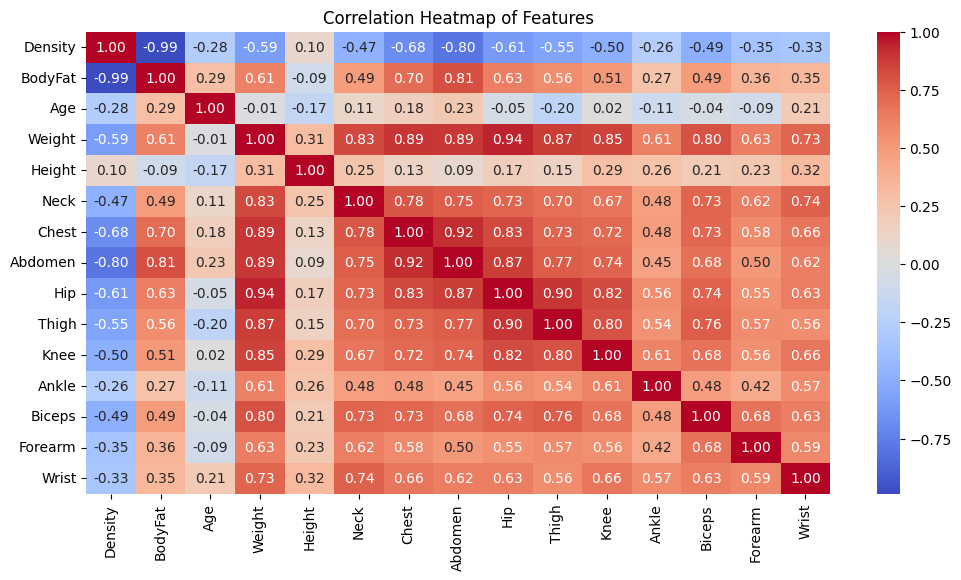

In [9]:
# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

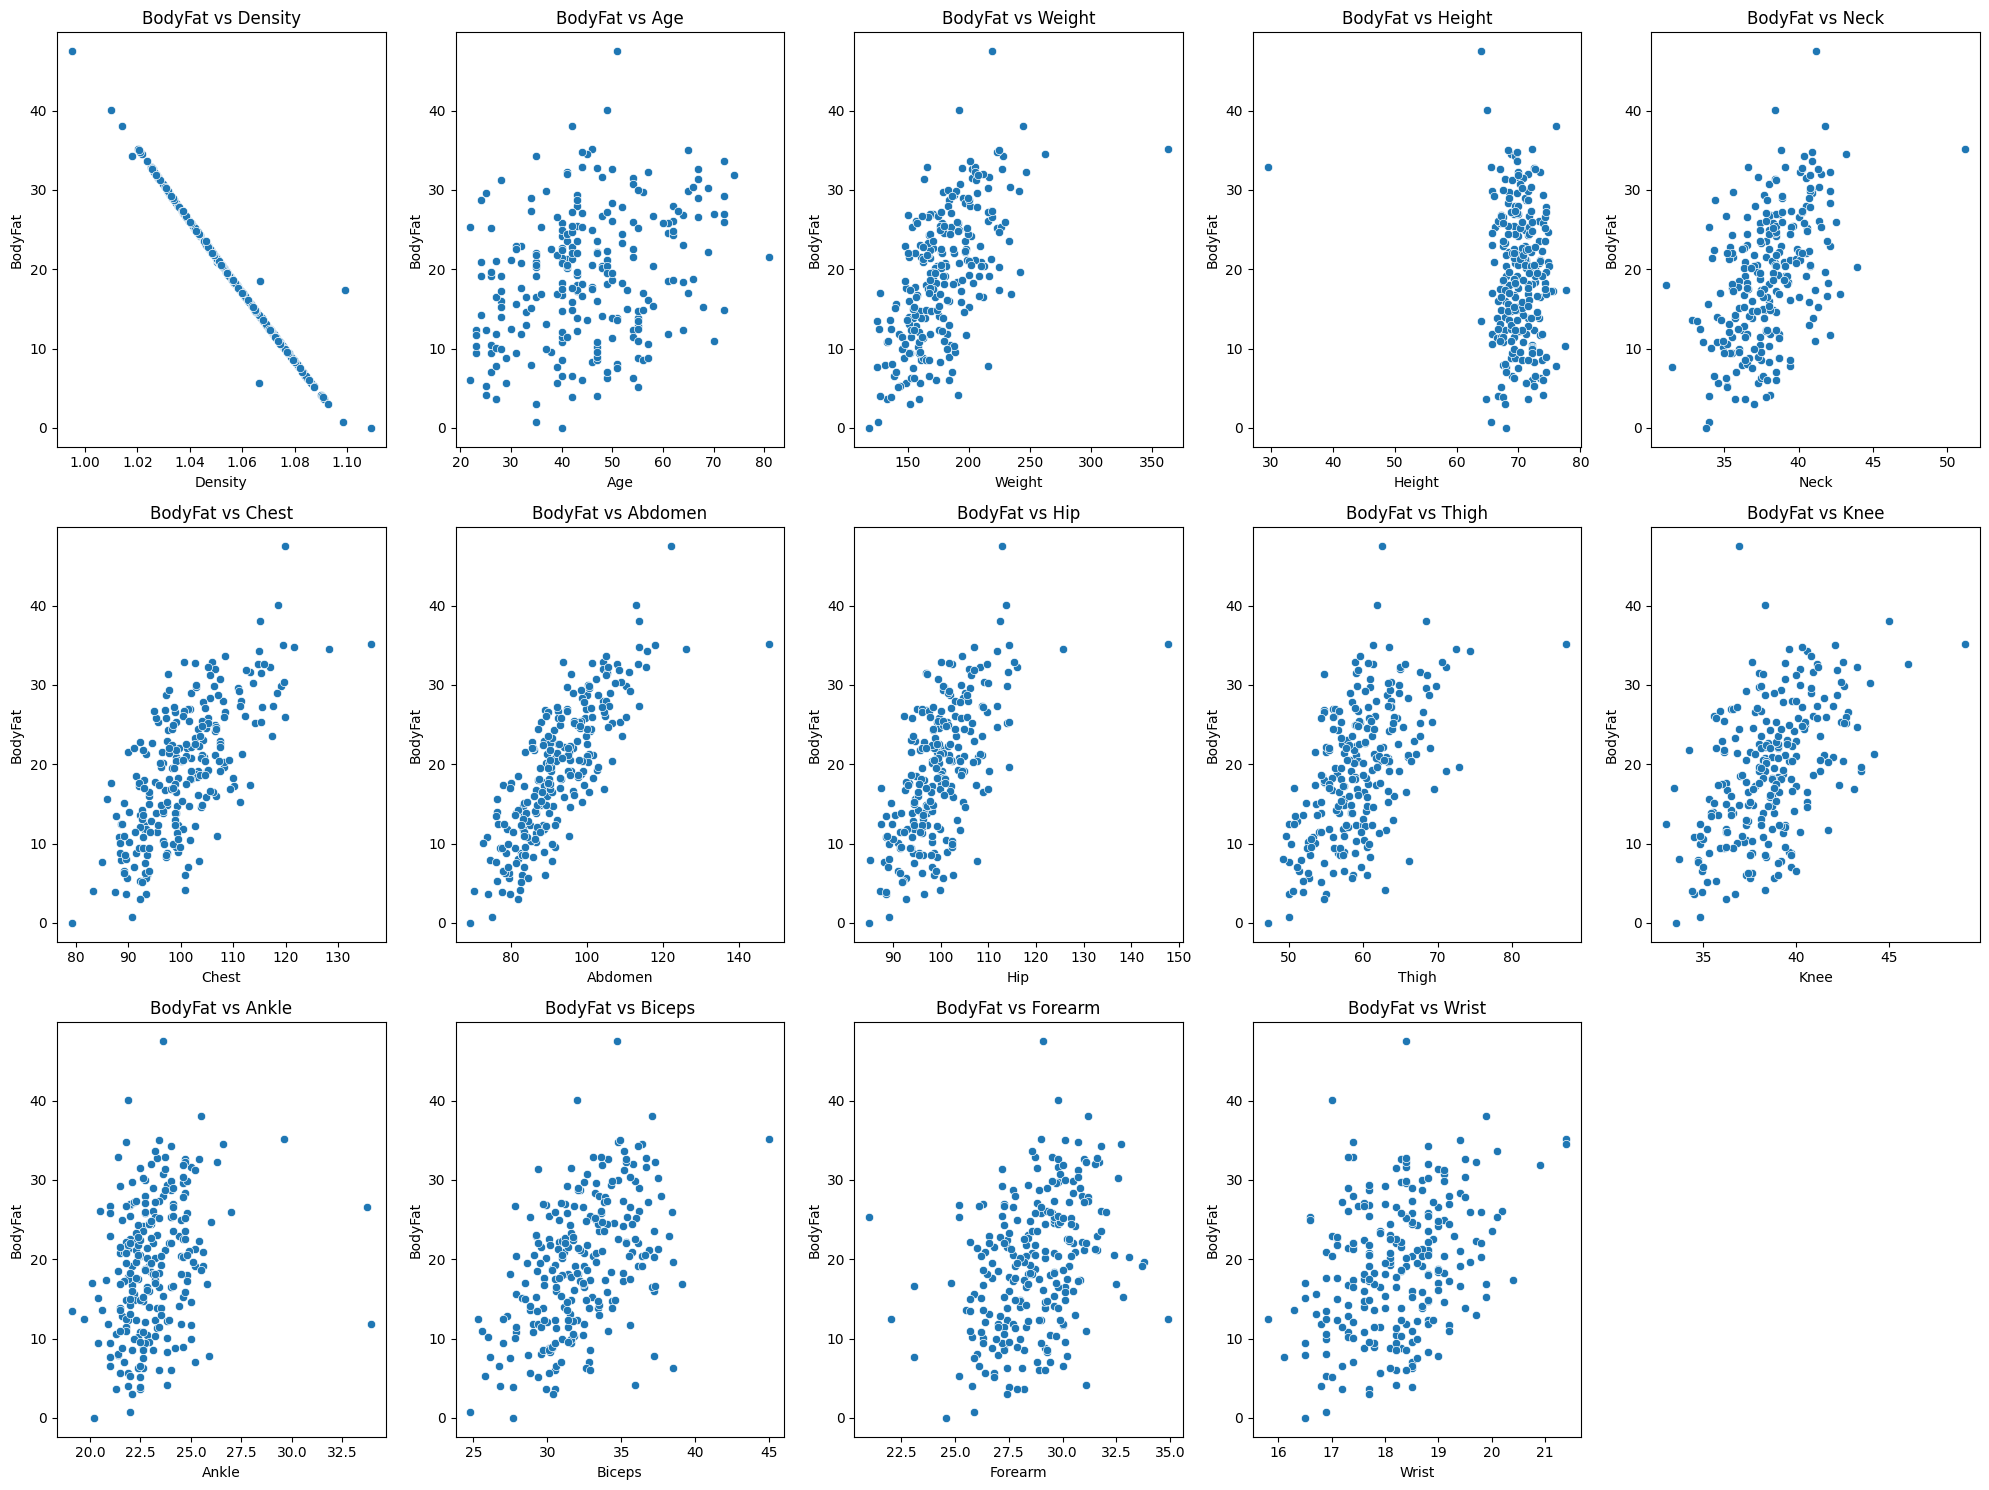

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
            'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps',
            'Forearm', 'Wrist']

plt.figure(figsize=(20, 15))  # Adjust figure size

for i, feature in enumerate(features, 1):
    plt.subplot((len(features) - 1) // 5 + 1, 5, i)
    sns.scatterplot(x=df[feature], y=df['BodyFat'])
    plt.title(f'BodyFat vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('BodyFat')

plt.tight_layout()
plt.show()

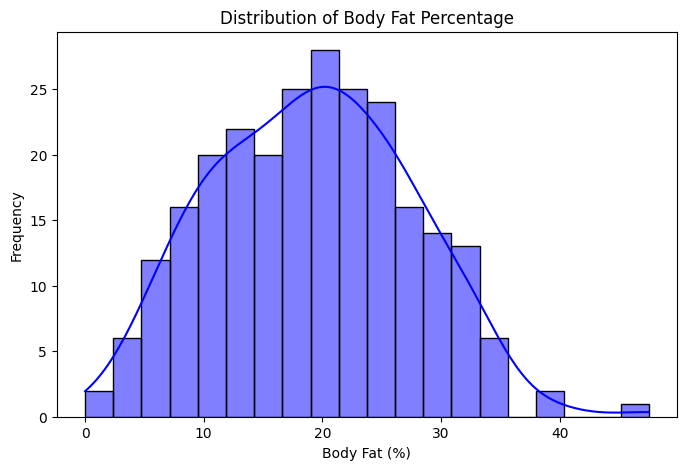

In [11]:
# Histogram of Body Fat Percentage
plt.figure(figsize=(8, 5))
sns.histplot(df['BodyFat'], bins=20, kde=True, color='blue')
plt.title("Distribution of Body Fat Percentage")
plt.xlabel("Body Fat (%)")
plt.ylabel("Frequency")
plt.show()

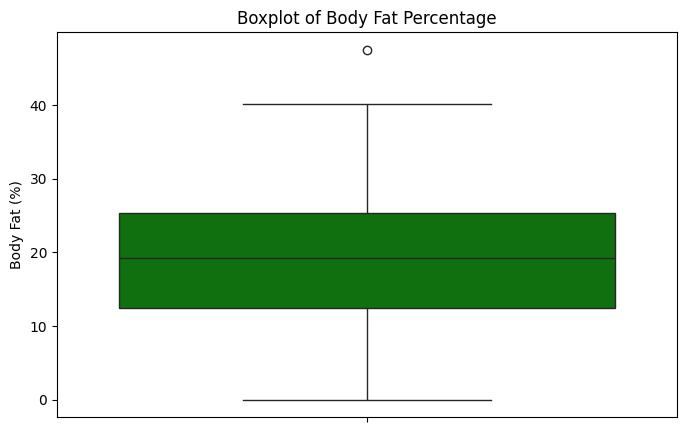

In [12]:
# Boxplot to check for outliers in Body Fat Percentage
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['BodyFat'], color='green')
plt.title("Boxplot of Body Fat Percentage")
plt.ylabel("Body Fat (%)")
plt.show()

# 2. Build a Model from Scratch:
 For the Regression task, build an appropriate model from scratch, such as Linear Regression, and report the
 appropriate evaluation metrics on the train and test sets (e.g., Mean Squared Error, R-squared).

In [13]:
df = df.dropna()

In [14]:
# Features and target
X = df.drop(columns=["BodyFat"]).values  # Convert to NumPy array
y = df["BodyFat"].values

In [15]:
# Splitting data into training and test sets
def train_test_split_custom(X, y, test_size=0.2, random_seed=42):
    np.random.seed(random_seed)
    indices = np.random.permutation(len(X))
    test_size = int(len(X) * test_size)
    test_idx, train_idx = indices[:test_size], indices[test_size:]
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

X_train, X_test, y_train, y_test = train_test_split_custom(X, y)

In [16]:
# Feature Scaling
def standardize(X):
    mean, std = X.mean(axis=0), X.std(axis=0)
    return (X - mean) / std, mean, std


X_train_scaled, mean, std = standardize(X_train)
X_test_scaled = (X_test - mean) / std

In [17]:
# Cost function and gradient descent
def compute_cost(X, y, weights):
    m = len(y)
    predictions = np.dot(X, weights)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

In [18]:
def gradient_descent(X, y, alpha, iterations):
    m, n = X.shape
    weights = np.zeros(n)
    cost_history = []

    for _ in range(iterations):
        predictions = np.dot(X, weights)
        gradient = (1 / m) * np.dot(X.T, (predictions - y))
        weights -= alpha * gradient
        cost_history.append(compute_cost(X, y, weights))

    return weights, cost_history

In [19]:
# Prepare data for training
X_b = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]  # Add bias term

In [20]:
# Train model using gradient descent
alpha = 0.01  # Learning rate
iterations = 1000
weights, cost_history = gradient_descent(X_b, y_train, alpha, iterations)

In [21]:
# Predictions
def predict(X, weights):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
    return np.dot(X_b, weights)

y_pred = predict(X_test_scaled, weights)

In [22]:
# Model Evaluation
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [23]:
def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

In [24]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-Squared Score: {r2}")


Mean Squared Error: 0.40587927205649754
R-Squared Score: 0.9902038534718868


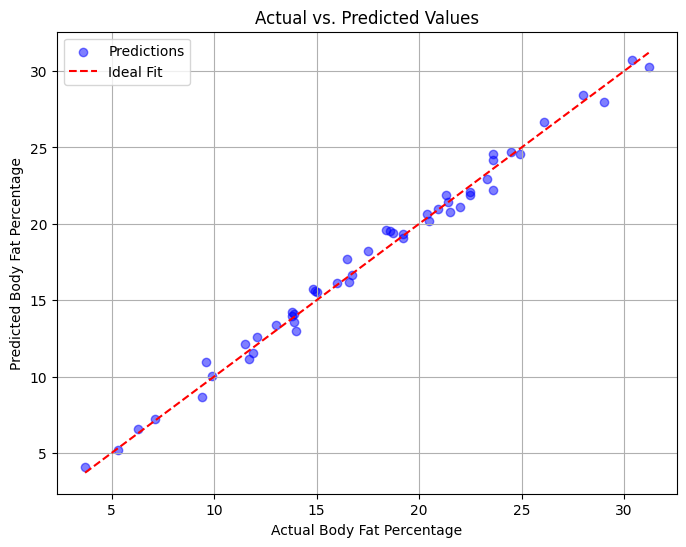

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label="Predictions")

# Reference line (perfect prediction line)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Ideal Fit")

plt.xlabel("Actual Body Fat Percentage")
plt.ylabel("Predicted Body Fat Percentage")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.grid()
plt.show()


3. Build a Primary Model [5]:
 After assembling your dataset and analyzing its key characteristics, the next step is to build, train, and
 evaluate your models. Follow the steps below to complete this task:
 1. Split the dataset into training and testing sets.
 2. Build at least two different machine learning models for the regression task.
 3. Evaluate both models on the test dataset using appropriate performance metrics (e.g., Mean
 Absolute Error, Root Mean Squared Error, R-squared).
 4. Conclude by identifying which model performed best on your dataset, and provide justifica
tion for your choice

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [27]:
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
# Initialize models
linear_model = LinearRegression()
lasso_model = Lasso(alpha=0.1)  # Alpha controls regularization strength

In [30]:
# Train models
linear_model.fit(X_train_scaled, y_train)



LinearRegression()

In [31]:
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

In [32]:
# Make predictions
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_lasso = lasso_model.predict(X_test_scaled)

In [33]:
# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"Model: {model_name}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-Squared (R²): {r2:.4f}")
    print("-" * 50)

In [34]:
# Evaluate both models
evaluate_model(y_test, y_pred_linear, "Linear Regression")
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")

Model: Linear Regression
Mean Absolute Error (MAE): 0.4595
Mean Squared Error (MSE): 0.3803
Root Mean Squared Error (RMSE): 0.6167
R-Squared (R²): 0.9918
--------------------------------------------------
Model: Lasso Regression
Mean Absolute Error (MAE): 0.4261
Mean Squared Error (MSE): 0.2641
Root Mean Squared Error (RMSE): 0.5139
R-Squared (R²): 0.9943
--------------------------------------------------


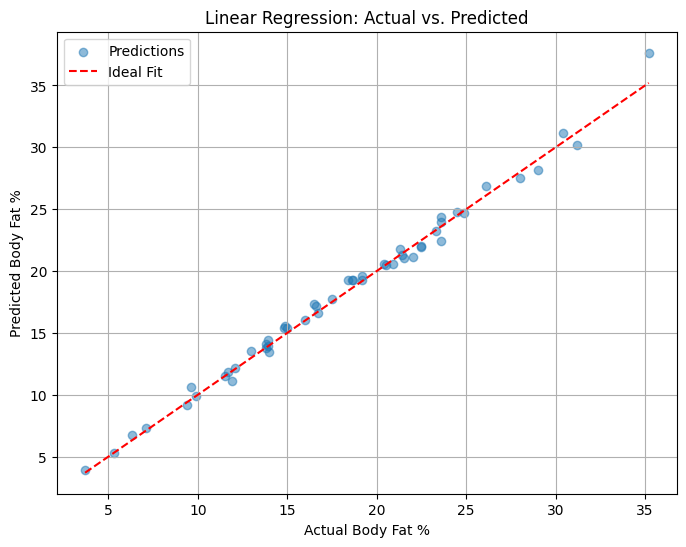

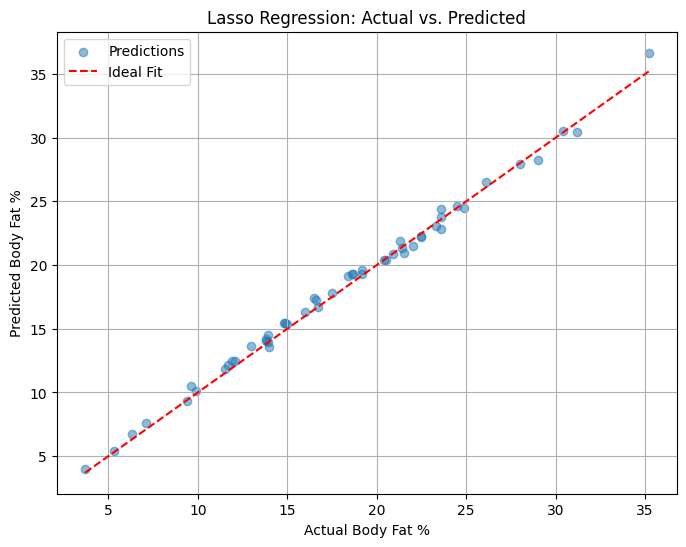

In [35]:
import matplotlib.pyplot as plt

def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.5, label="Predictions")
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--', label="Ideal Fit")
    plt.xlabel("Actual Body Fat %")
    plt.ylabel("Predicted Body Fat %")
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

# Plot for Linear Regression
plot_actual_vs_predicted(y_test, y_pred_linear, "Linear Regression: Actual vs. Predicted")

# Plot for Lasso Regression
plot_actual_vs_predicted(y_test, y_pred_lasso, "Lasso Regression: Actual vs. Predicted")


# 4. Hyper-parameter Optimization with Cross-Validation

In [36]:
# Define hyperparameter grid for Lasso Regression (correct parameter reference)
lasso_params = {'lasso__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# Create a pipeline with feature scaling and model
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(max_iter=10000))  # Ensure convergence
])

In [37]:
# Perform GridSearchCV for Lasso
lasso_grid = GridSearchCV(lasso_pipeline, param_grid=lasso_params, cv=5, scoring='r2', n_jobs=-1)
lasso_grid.fit(X_train, y_train)  # No need to scale manually since it's in the pipeline

# Get best Lasso model
best_lasso = lasso_grid.best_estimator_

In [38]:
# Cross-validation for Linear Regression (to check performance)
from sklearn.model_selection import cross_val_score

linear_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('linear', LinearRegression())
])

linear_cv_scores = cross_val_score(linear_pipeline, X_train, y_train, cv=5, scoring='r2')

In [39]:
# Print results
print(f"Best Lasso Alpha: {lasso_grid.best_params_['lasso__alpha']}")
print(f"Lasso Best R² Score (CV): {lasso_grid.best_score_:.4f}")
print(f"Linear Regression Average R² Score (CV): {linear_cv_scores.mean():.4f}")


Best Lasso Alpha: 0.1
Lasso Best R² Score (CV): 0.9675
Linear Regression Average R² Score (CV): 0.9658


The best model is Lasso Regression with an optimized alpha = 0.1, achieving an R² score of 0.9675, slightly outperforming Linear Regression (R² = 0.9658). The improvement suggests that Lasso's regularization helps reduce overfitting while maintaining high accuracy. Additionally, Lasso performs feature selection by reducing the impact of less important predictors, making the model more interpretable. Given its better generalization and feature selection benefits, Lasso Regression is the preferred model for predicting body fat percentage.

# 5. Feature Selection:
 In this section, apply one of the feature selection techniques discussed in the Week-10 tutorial to identify and
 select the most relevant features for your models. Clearly document your process and justify your choice of
 features

In [61]:
# Use the original feature names from the unscaled dataset
feature_names = df.columns  # X is the original DataFrame with feature names

# Retrieve Lasso coefficients
lasso_coefficients = best_lasso.named_steps['lasso'].coef_

# Filter out zero coefficients
non_zero_indices = np.where(lasso_coefficients != 0)[0]
filtered_features = feature_names[non_zero_indices]
filtered_coefficients = lasso_coefficients[non_zero_indices]

In [62]:
# Create a DataFrame to display feature importance
feature_importance = pd.DataFrame({
    'Feature': filtered_features,
    'Coefficient': filtered_coefficients
})

In [63]:
# Remove "BodyFat" from the feature importance list
feature_importance = feature_importance[feature_importance['Feature'] != "BodyFat"]

In [64]:
# Sort features by importance
feature_importance = feature_importance.reindex(feature_importance['Coefficient'].abs().sort_values(ascending=False).index)

In [65]:
# Display the most important features
print(feature_importance)

   Feature  Coefficient
0  Density    -7.897722
3    Chest     0.526594
2     Neck     0.138644


 # 6. Final Model [2.5]:
 Using the optimal hyperparameters identified in Task- 4 and the selected features from Task- 5, rebuild
 both models from Task- 3. Evaluate the performance of the final models and provide a summary of your
 f
 indings.

In [54]:
# Select only the important features (non-zero coefficients) from the original dataset
selected_features = feature_importance[feature_importance['Coefficient'] != 0]['Feature'].values

# Split the original df into X and y
X = df.drop(columns=["BodyFat"])  # Assuming BodyFat is the target
y = df["BodyFat"]

In [55]:
# Split the data into train and test sets again (before scaling)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Select features from the original, unscaled dataset (df)
X_train_selected = X_train[selected_features]  # Directly select from X_train using the selected features
X_test_selected = X_test[selected_features]    # Directly select from X_test using the selected features

In [57]:
# Feature scaling before training the model
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)


In [58]:
# Train Lasso again using only selected features
lasso_model_selected = Lasso(alpha=0.1, max_iter=10000)
lasso_model_selected.fit(X_train_selected_scaled, y_train)


Lasso(alpha=0.1, max_iter=10000)

In [59]:
# Predict and evaluate
y_pred_selected = lasso_model_selected.predict(X_test_selected_scaled)
r2_selected = r2_score(y_test, y_pred_selected)

In [60]:
print(f"R² Score with Selected Features: {r2_selected:.4f}")
print(f"Selected Features: {selected_features}")


R² Score with Selected Features: 0.9953
Selected Features: ['Density' 'Chest' 'Neck']


In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the model
linear_model = LinearRegression()
linear_model.fit(X_train_selected, y_train)

LinearRegression()

In [43]:
# Predictions
y_pred_linear = linear_model.predict(X_test_selected)

In [44]:

# Evaluate Performance
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

In [45]:
print(" Final Linear Regression Performance:")
print(f"MAE: {mae_linear:.4f}, MSE: {mse_linear:.4f}, R²: {r2_linear:.4f}")

 Final Linear Regression Performance:
MAE: 0.3815, MSE: 0.2201, R²: 0.9953


In [46]:
# Select the important features based on previous Lasso model
selected_features = feature_importance['Feature'].values

# Select features from the original dataset (X_train, X_test)
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [47]:
# Feature scaling
scaler = StandardScaler()
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)


In [48]:
# Train Lasso with the best hyperparameters (alpha=0.1 from previous step)
lasso_model = Lasso(alpha=0.1, max_iter=10000)
lasso_model.fit(X_train_selected_scaled, y_train)

Lasso(alpha=0.1, max_iter=10000)

In [49]:
# Predict on the test set
y_pred = lasso_model.predict(X_test_selected_scaled)

In [50]:
# Evaluate the model using R², MSE, and MAE
r2_selected = r2_score(y_test, y_pred)
mse_selected = mean_squared_error(y_test, y_pred)
mae_selected = mean_absolute_error(y_test, y_pred)

In [51]:
# Display the results
print(f"Final Lasso Model R² Score: {r2_selected:.4f}")
print(f"Mean Squared Error (MSE): {mse_selected:.4f}")
print(f"Mean Absolute Error (MAE): {mae_selected:.4f}")
print(f"Selected Features: {selected_features}")

Final Lasso Model R² Score: 0.9953
Mean Squared Error (MSE): 0.2172
Mean Absolute Error (MAE): 0.3922
Selected Features: ['Density' 'Chest' 'Neck']


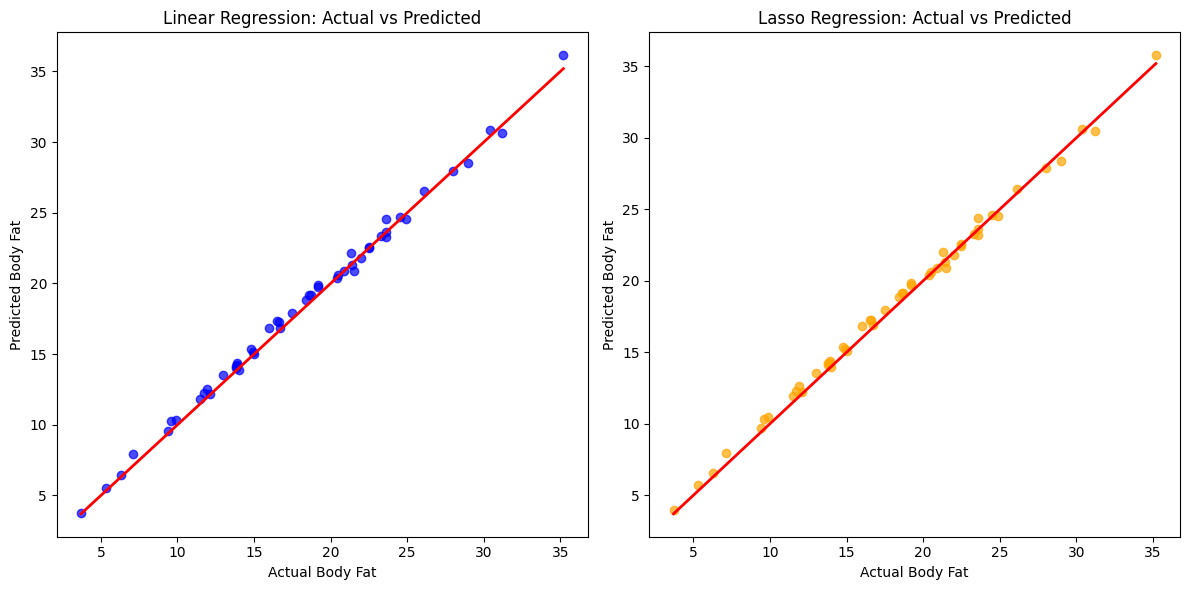

In [52]:
# Scatter plot: Actual vs Predicted for Linear Regression
plt.figure(figsize=(12, 6))

# Plot for Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Diagonal line (perfect prediction)
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Body Fat')
plt.ylabel('Predicted Body Fat')

# Plot for Lasso Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_selected, color='orange', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Diagonal line (perfect prediction)
plt.title('Lasso Regression: Actual vs Predicted')
plt.xlabel('Actual Body Fat')
plt.ylabel('Predicted Body Fat')

# Display the plots
plt.tight_layout()
plt.show()


Final Lasso Model R² Score: 0.9953
Mean Squared Error (MSE): 0.2172
Mean Absolute Error (MAE): 0.3922
Selected Features: ['Density', 'Chest', 'Neck']

Final Linear Regression Performance:
MAE: 0.3815, MSE: 0.2201, R²: 0.9953


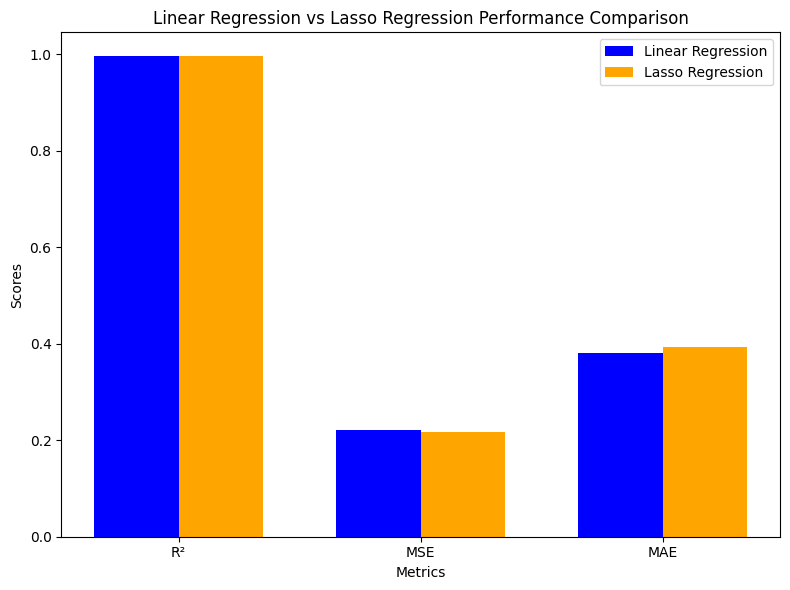

In [53]:
import matplotlib.pyplot as plt
import numpy as np

mae_linear = 0.3815
mse_linear = 0.2201
r2_linear = 0.9953

mae_selected = 0.3922
mse_selected = 0.2172
r2_selected = 0.9953

# Selected Features for Lasso
selected_features = ['Density', 'Chest', 'Neck']

# Print the results for both models
print(f"Final Lasso Model R² Score: {r2_selected:.4f}")
print(f"Mean Squared Error (MSE): {mse_selected:.4f}")
print(f"Mean Absolute Error (MAE): {mae_selected:.4f}")
print(f"Selected Features: {selected_features}")

print("\nFinal Linear Regression Performance:")
print(f"MAE: {mae_linear:.4f}, MSE: {mse_linear:.4f}, R²: {r2_linear:.4f}")

# Data for Linear Regression
linear_regression_metrics = {
    'R²': r2_linear,
    'MSE': mse_linear,
    'MAE': mae_linear
}

# Data for Lasso Regression
lasso_regression_metrics = {
    'R²': r2_selected,
    'MSE': mse_selected,
    'MAE': mae_selected
}

# Labels for the metrics
metrics = ['R²', 'MSE', 'MAE']

# Create the bar chart
fig, ax = plt.subplots(figsize=(8, 6))

bar_width = 0.35
index = np.arange(len(metrics))

# Bar positions
bar1 = ax.bar(index, list(linear_regression_metrics.values()), bar_width, label='Linear Regression', color='blue')
bar2 = ax.bar(index + bar_width, list(lasso_regression_metrics.values()), bar_width, label='Lasso Regression', color='orange')

# Labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Linear Regression vs Lasso Regression Performance Comparison')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metrics)
ax.legend()

# Display the chart
plt.tight_layout()
plt.show()


Both Linear Regression and Lasso Regression perform similarly with an R² score of 0.9953. Lasso has a slightly lower MSE, while Linear Regression has a marginally better MAE. Lasso also selects key features, making it more interpretable. Overall, Lasso is slightly better in accuracy and simplicity.